#Задача зеленого экрана, морфология


Задание:

1. Найти и скачать изображение с объектом на зеленом фоне

2. Создать маску объекта

3. Улучшить маску, работая над морфологией

4. Прикрепить результат к заданию

#Маска обьекта

In [8]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from PIL import Image


In [9]:
img = Image.open('cat.jpg')
arr = np.asarray(img, dtype='uint8')
itog = arr.copy()

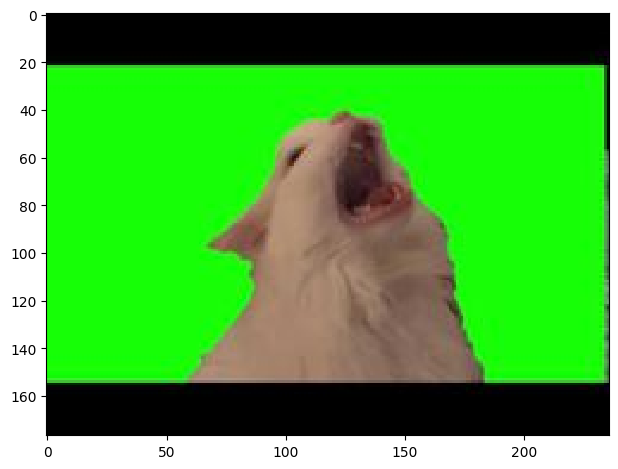

In [10]:
io.imshow(itog)

<ipython-input-11-bc8780cf40df>:4: RuntimeWarning: overflow encountered in scalar add
  if itog[i][j][0] + itog[i][j][2] + constant <=itog[i][j][1] and itog[i][j][1]>200:


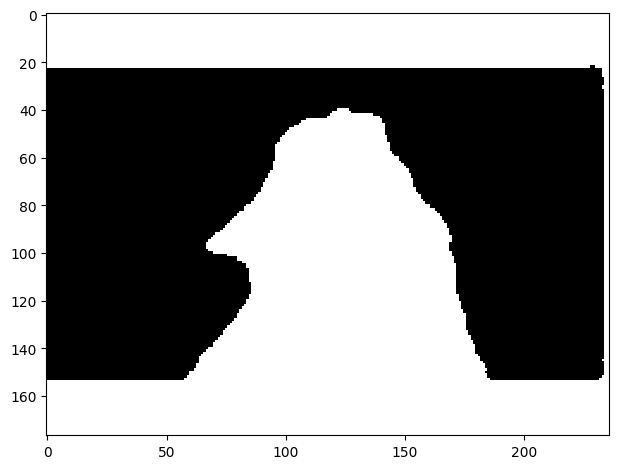

In [11]:
constant=120
for i in range(len(itog)):
    for j in range(len(itog[0])):
        if itog[i][j][0] + itog[i][j][2] + constant <=itog[i][j][1] and itog[i][j][1]>200:
            itog[i][j][0] = 0
            itog[i][j][1] = 0
            itog[i][j][2] = 0
        else:
            itog[i][j][0] = 255
            itog[i][j][1] = 255
            itog[i][j][2] = 255

io.imshow(itog)

#Морфология

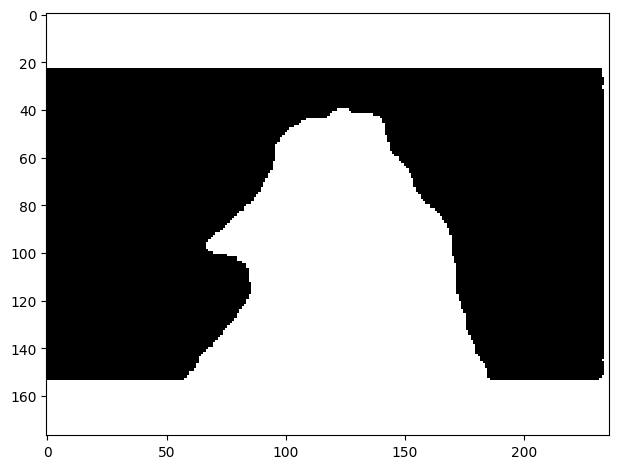

In [12]:
for i in range(len(itog)):
    for j in range(len(itog[0])):
        if itog[i][j][0] == 0:
          if j !=len(itog[0])-1 and i != len(itog)-1 and j-1>=0 and i-1>=0:
            if itog[i][j-1][0]==255 and itog[i-1][j][0]==255:
              t=0
              k=1
              h=0
              w=0
              while t==0 and j+k >=0:
                if j+k<len(itog[0])-1:
                  if itog[i][j+k][0]==255:
                    h=1
                if i+k<len(itog)-1:
                  if itog[i+k][j][0]==255:
                    w=1
                if w==1 and h==1:
                  t=1
                  break
                if j+k>=len(itog[0])-1 and i+k>=len(itog)-1:
                  t=1
                  break
                else:
                  k+=1
              if h==1 and w==1:
                itog[i][j][0] = 255
                itog[i][j][1] = 255
                itog[i][j][2] = 255
io.imshow(itog)